---
title: "Supervised Learning"
format:
    html: 
        code-fold: true
execute:
    warning: false
---


{{< include overview.qmd >}} 

# Code 

Code for this webpage can be found [here.](https://github.com/dsan-5000/project-dcorc7/blob/main/technical-details/supervised-learning/main.ipynb)


## Importing Python Libraries

The first step to working with unsupervised learning techniques is to import the appropriate Python libaries. The Python packages that I imported, as well as the reasons for importing them, are as follows:

- **pandas:** To work with and store retrieved data into pandas dataframes

- **numpy:** To perform statistical and mathematic operations (manipulate a correlation matrix) 

- **sklearn:** To perform supervised learning techniques (regression, binary classification, multi classification)

- **matplotlib:** To create professional-looking statiscal plots on the cleaned movie data

- **seaborn:** To accompany the plots made using the matplotlib library

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [29]:
movies_df = pd.read_csv("../../data/processed-data/movies_cleaned.csv")

## Regression

### Ensure Data is Fit for Modeling

To conduct regression, the movie dataset must not contain any categorical values. Instead, the categorical dataypes will be converted by encoding. The Age_Rating values will use label encoding, which converts each age rating into a differnt number based on its value. More mature movies will get assigned a higher number. Genres will be transformed using One Hot Encoding. This method will create a new column per genre and assign the value "1" to the genre column that the movie belongs in, and a "0" value to the rest of the genre columns. The dafaframe was then standardized using StandardScaler to ensure certain columns won't produce extreme bias.

In [30]:
# Create new dataframe with just numerical data, no categorical or text data
columns_to_keep = ["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating",
                   "TMDB_Rating", "Average_Rating", "Budget_Normalized",
                   "Revenue_Normalized", "Return_On_Investment", "Popularity", "Age_Rating",
                   "Oscar_Wins", "Oscar_Nominations"]
numerical_movies_df = movies_df[columns_to_keep]


# Encode Age_Rating labels
label_encoder = LabelEncoder()
numerical_movies_df["Age_Rating_Encoded"] = label_encoder.fit_transform(movies_df["Age_Rating"])

# One hot encode genres
genre_df = pd.get_dummies(movies_df["Genre"], prefix = "Genre")

# Add one-hot encoded Genre columns
numerical_movies_df = pd.concat([numerical_movies_df, genre_df], axis = 1)

# Drop catagorized Age_Rating column
numerical_movies_df = numerical_movies_df.drop(["Age_Rating"], axis = 1)

# Standardize data
scaler = StandardScaler()
numerical_movies_scaled = scaler.fit_transform(numerical_movies_df)

# Display the new regression df
regression_df = pd.DataFrame(numerical_movies_scaled, columns = numerical_movies_df.columns)
pd.set_option("display.max_columns", None)
regression_df.head(5)

C:\Users\DCorc\AppData\Local\Temp\ipykernel_10160\2216003337.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_movies_df["Age_Rating_Encoded"] = label_encoder.fit_transform(movies_df["Age_Rating"])


,Year,Runtime,Metascore_Rating,IMDB_Rating,Rotten_Tomatoes_Rating,TMDB_Rating,Average_Rating,Budget_Normalized,Revenue_Normalized,Return_On_Investment,Popularity,Oscar_Wins,Oscar_Nominations,Age_Rating_Encoded,Genre_action,Genre_comedy,Genre_crime,Genre_drama,Genre_fantasy,Genre_horror,Genre_music,Genre_mystery,Genre_romance,Genre_science fiction,Genre_thriller,Genre_war
0,-1.117704,1.076580,1.580220,0.958768,1.488034,0.742107,1.438518,-0.908758,-0.813557,-0.024372,-0.512028,0.649806,-0.343052,0.006620,-0.30776,-0.30776,-0.308905,-0.281808,-0.308905,-0.310047,-0.286645,-0.303154,-0.30776,-0.310047,-0.299668,3.518231
1,0.420583,-0.539283,-0.667707,-0.204086,-0.616113,-0.615094,-0.607539,0.284211,0.169128,-0.024333,0.924333,-0.279504,-0.343052,1.029158,-0.30776,-0.30776,-0.308905,-0.281808,-0.308905,-0.310047,-0.286645,-0.303154,-0.30776,-0.310047,3.337022,-0.284234
2,1.079849,0.126072,-1.081799,-0.944083,-1.179723,-0.479374,-1.105710,1.292354,-0.206442,-0.024370,-0.293364,-0.279504,-0.343052,0.006620,-0.30776,-0.30776,-0.308905,-0.281808,-0.308905,-0.310047,-0.286645,-0.303154,-0.30776,-0.310047,3.337022,-0.284234
3,0.420583,0.078547,-0.371927,-0.098372,-0.803983,-0.479374,-0.571956,2.300497,0.399285,-0.024362,-0.140647,-0.279504,-0.343052,0.006620,3.24928,-0.30776,-0.308905,-0.281808,-0.308905,-0.310047,-0.286645,-0.303154,-0.30776,-0.310047,-0.299668,-0.284234
4,0.640339,-0.111555,-0.135303,0.113056,0.323239,-0.207934,0.104133,1.796426,1.546130,-0.024327,0.298148,-0.279504,-0.343052,0.006620,3.24928,-0.30776,-0.308905,-0.281808,-0.308905,-0.310047,-0.286645,-0.303154,-0.30776,-0.310047,-0.299668,-0.284234


### Linear Regression for Revenue Prediction

To perform linear regression on the movie data, sklearn's LinearRegression() module was used. This method was used to detemine the relationships between the many movie features in the dataset to a target variable of Revenue. Inputs of these model include: Year, Runtime, Ratings, Budget, Popularity, Age Rating, Osacr Wins, Oscar Nominations, and Genres.

The first regression model below attempts to predict the earned revenue of a movie based on the movie featuress in the dataset. The model establishes an 80-20 split between training and testing variables. After running the model, a mean squared error (MSE) of 0.3328 and an R-Squared (R2) values of 0.6571 were produced. MSE measures the average squared difference between the predicted values and the actual values. In other words, it is an indicator of how far off the model prediction is from the actual dependent variable value. R2 measures how well the independent variables explain variance in the target variable. An R-squared value of 0.6571 means that 65.71% of the variation in Revenue can be explained by the predictors. As a result, this model performed moderately when attempting to predict box office revenue.

The coefficients of the model provide insights into the impact of each feature on the predicted earned revenue. Larger absolute coefficients indicate stronger effects. Notable features such as Budget_Normalized, Popularity, and Rotten_Tomatoes_Rating have the largest coefficients, suggesting that these variables have the most significant influence on the model's predictions. Popularity has a positive coefficient of 0.2187, meaning that higher popularity is associated with higher earned revenue. Budget_Normalized has the largest coefficient of 0.5343, indicating that movies with a higher normalized budget tend to generate higher revenue. TMDB_Rating also has a positive coefficient of 0.1144, highlighting the importance of audience ratings in revenue prediction.

To summarize, the model performed **moderately well** in predicting earned revenue, as indicated by the relatively high R² value.

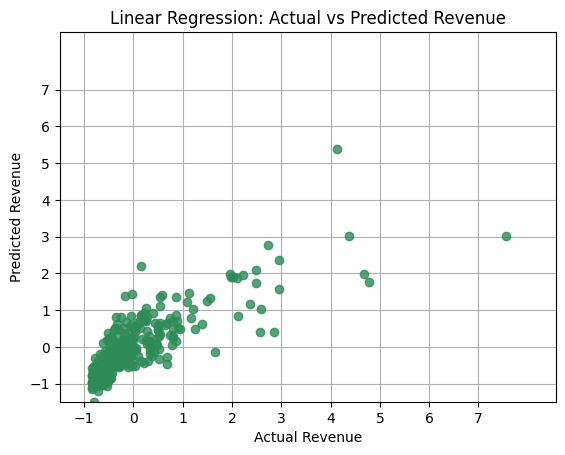

Linear Regression For Earned Revenue Overview
Mean Squared Error: 0.3328408467983277
R-squared: 0.6570938133141171

                   Feature  Coefficient  Abs Coefficient
19   Genre_science fiction     0.000364         0.000364
15            Genre_horror    -0.001173         0.001173
0                     Year     0.001701         0.001701
13             Genre_drama     0.002212         0.002212
20          Genre_thriller     0.006480         0.006480
23       Oscar_Nominations     0.006592         0.006592
18           Genre_romance     0.006592         0.006592
14           Genre_fantasy     0.017381         0.017381
9       Age_Rating_Encoded    -0.019826         0.019826
1                  Runtime     0.023111         0.023111
12             Genre_crime    -0.034891         0.034891
6           Average_Rating     0.035853         0.035853
16             Genre_music    -0.043115         0.043115
3              IMDB_Rating    -0.049404         0.049404
2         Metascore_Rating   

In [31]:
# Decide which variables will be inputs and which will be a target variable
X = regression_df[["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating", "TMDB_Rating", 
                   "Average_Rating", "Budget_Normalized", "Popularity", 
                   "Age_Rating_Encoded", "Genre_action", "Genre_comedy", "Genre_crime", 
                   "Genre_drama", "Genre_fantasy", "Genre_horror", "Genre_music", "Genre_mystery", "Genre_romance", 
                   "Genre_science fiction", "Genre_thriller", "Genre_war", "Oscar_Wins", "Oscar_Nominations"
]]

y = regression_df["Revenue_Normalized"]

# Split the data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Run the model and make predictions
y_pred = model.predict(X_test)


# Genreate plot of regression model results
plt.scatter(y_test, y_pred, color = "seagreen", alpha = 0.8, zorder = 2)
plt.title("Linear Regression: Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.xlim([min(y_test.min(), y_pred.min()), max(y_test.max() + 1, y_pred.max() + 1)])
plt.ylim([min(y_test.min(), y_pred.min()), max(y_test.max() + 1, y_pred.max() + 1)])
plt.xticks(range(int(min(y_test.min(), y_pred.min())), int(max(y_test.max(), y_pred.max())) + 1, 1))
plt.yticks(range(int(min(y_test.min(), y_pred.min())), int(max(y_test.max(), y_pred.max())) + 1, 1))
plt.grid(True, zorder = 0)
plt.show()


# Obtain evaluation metrics
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Print a model overview
print("Linear Regression For Earned Revenue Overview")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {R2}\n")


# Gather each input's coefficient value
coefficients = model.coef_

# Display the features and their coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})

# Determine the most important features
feature_importance["Abs Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by = "Abs Coefficient", ascending = True)


# Print feature importances
print(feature_importance)

### Linear Regression For Oscar Wins Prediction

The second regression model below attempts to predict the number of Oscar Wins for a movie based on various features in the dataset. Inputs of this model include: Year, Runtime, Ratings, Budget, Revenue, Popularity, Age Rating, and Genres. The model uses an 80-20 split between training and testing variables. After running the model, the Mean Squared Error (MSE) was 0.8342 and the R-squared (R²) value was 0.3043. The MSE value of 0.8342 suggests that there is a moderate error between the predicted and actual Oscar Wins values, and the R² value of 0.3043 means that only 30.43% of the variation in Oscar Wins can be explained by the predictors used in the model. This indicates that the model performed poorly when predicting Oscar Wins.

The coefficients of the model provide insights into the impact of each feature on the predicted Oscar Wins. Larger absolute coefficients indicate stronger effects. Notable features such as Genre-related variables and Metascore Rating show very high absolute values, indicating that these features have a significant influence on the model.

In summary, the model performed **poorly** in predicting Oscar Wins. The low R² value suggests that there are other important factors not captured by the model that tend influence Oscar Wins.

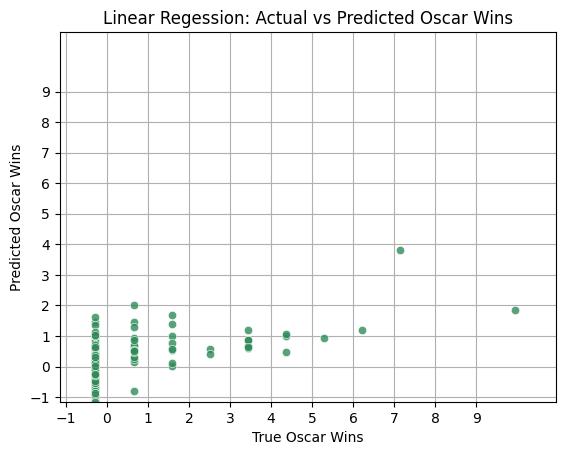

Linear Regression For Oscar Wins Overview
Mean Squared Error: 0.8341517917043919
R-squared: 0.3043195623792381

                   Feature   Coefficient  Abs Coefficient
9     Return_On_Investment -1.940478e-04     1.940478e-04
10              Popularity  1.814971e-02     1.814971e-02
11      Age_Rating_Encoded -2.886037e-02     2.886037e-02
8       Revenue_Normalized  1.201844e-01     1.201844e-01
7        Budget_Normalized -1.282419e-01     1.282419e-01
0                     Year -2.019339e-01     2.019339e-01
1                  Runtime  2.235966e-01     2.235966e-01
5              TMDB_Rating -3.505443e+12     3.505443e+12
15             Genre_drama  3.752081e+12     3.752081e+12
23               Genre_war  3.779575e+12     3.779575e+12
18             Genre_music  3.806796e+12     3.806796e+12
22          Genre_thriller  3.951864e+12     3.951864e+12
19           Genre_mystery  3.990136e+12     3.990136e+12
12            Genre_action  4.040354e+12     4.040354e+12
20           Genre

In [39]:
# Decide which variables will be inputs and which will be a target variable
X = regression_df[["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating", "TMDB_Rating", 
                   "Average_Rating", "Budget_Normalized", "Revenue_Normalized", "Return_On_Investment", "Popularity", 
                   "Age_Rating_Encoded", "Genre_action", "Genre_comedy", "Genre_crime", 
                   "Genre_drama", "Genre_fantasy", "Genre_horror", "Genre_music", "Genre_mystery", "Genre_romance", 
                   "Genre_science fiction", "Genre_thriller", "Genre_war"
]]

y = regression_df["Oscar_Wins"]

# Split the data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Run the modela nd make predictions
y_pred = model.predict(X_test)

sns.scatterplot(x = y_test, y = y_pred, color = "seagreen", alpha = 0.8, zorder = 2)
plt.title("Linear Regession: Actual vs Predicted Oscar Wins")
plt.xlabel("True Oscar Wins")
plt.ylabel("Predicted Oscar Wins")
plt.xlim([min(y_test.min(), y_pred.min()), max(y_test.max() + 1, y_pred.max() + 1)])
plt.ylim([min(y_test.min(), y_pred.min()), max(y_test.max() + 1, y_pred.max() + 1)])
plt.xticks(range(int(min(y_test.min(), y_pred.min())), int(max(y_test.max(), y_pred.max())) + 1, 1))
plt.yticks(range(int(min(y_test.min(), y_pred.min())), int(max(y_test.max(), y_pred.max())) + 1, 1))
plt.grid(True, zorder = 0)
plt.show()

# Genreate evaluation metrics
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Print a model overview
print(f"Linear Regression For Oscar Wins Overview")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {R2}\n")

# Gather feature coefficients
coefficients = model.coef_

# Show the features and their coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})

# Determine the most important features
feature_importance["Abs Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by = "Abs Coefficient", ascending = True)

# Print feature importances
print(feature_importance)

### Random Forest Regression For Revenue and Oscar Wins Prediction

Random Forest Regression was be conducted on the same two target varaible. In contrast to the previous regresssion model, these models will only use one hot encoded genres rather than the entire numerical dataframe. For each model, the dataset is split into training and test sets, with 80% of the data used for training and 20% for testing. The random forest regression model uses multiple decision trees to make predictions.

The resulting metrics of each model were training and testing Root Mean Squared Error (RMSE) and R² Scores, which are described below:

**Predicting Revenue**

- **RMSEs:** RMSEs measure the average magnitude of the errors between predicted and actual values. This model had a training RSME of 0.8289 and a testing RSME of 0.9247.

- **R² Score:** R² measures how well the independent variables explain the variance in the dependent variable (earned revenue). This model had an R² value of 0.2849, meaning that the model explains about 28.49% of the variance in revenue. This low result suggests that introducing factors other than genre could improve the model's performance in predicting revenue, and that genre alone is not a great predictor for revenue. 

In summary, the model performed **poorly** in attempting to predicting Revenue.

**Predicting Oscar Wins**

- **RMSEs:** RMSEs measure the average magnitude of the errors between predicted and actual values. This model had a training RSME of 0.9683 and a testing RSME of 0.9627. The testing and training errors are nearly the same, indicating that the model does not perform well in identifying efffective relationships between genre and oscar wins.

- **R² Score:** R² measures how well the independent variables explain the variance in the dependent variable (Oscar wins). This model had an R² value of 0.066, meaning that the model explains about 6.6% of the variance in oscar wins. This low result suggests that genres have very little predictive power for Oscar wins. 

In summary, the model performed **poorly** in attempting to predicting Oscar Wins.

Lastly, plots depicting genre importance for each model were constructed. These feature importance plots highlight the relative contributions of each genre to the prediction of the target variables (Revenue and Oscar wins). Even though genre isn't a large predictor in either case, it's still interesting to observe how different genres contribute. For box office revenue, action movies have the most influence by far, followed by science fiction, comedy, and fantasy. Action and science fiction films, particularly those featuring superheroes, often have large marketing campaigns and global distributions, leading to higher revenues. Comedy and Fantasy can also attract wide audiences due to their ability to entertain diverse demographics and translate well across cultures. As for Oscar wins, drama and war movies dominate the metric. 

Random Forest For Earned Revenue Overview
Training RMSE: 0.8288961592727209
Testing RMSE: 0.9247423548368007
R^2 Score: 0.284928617482453

Random Forest For Oscar Wins Overview
Training RMSE: 0.9683375580208536
Testing RMSE: 0.9624180629207331
R^2 Score: 0.0672587919360893


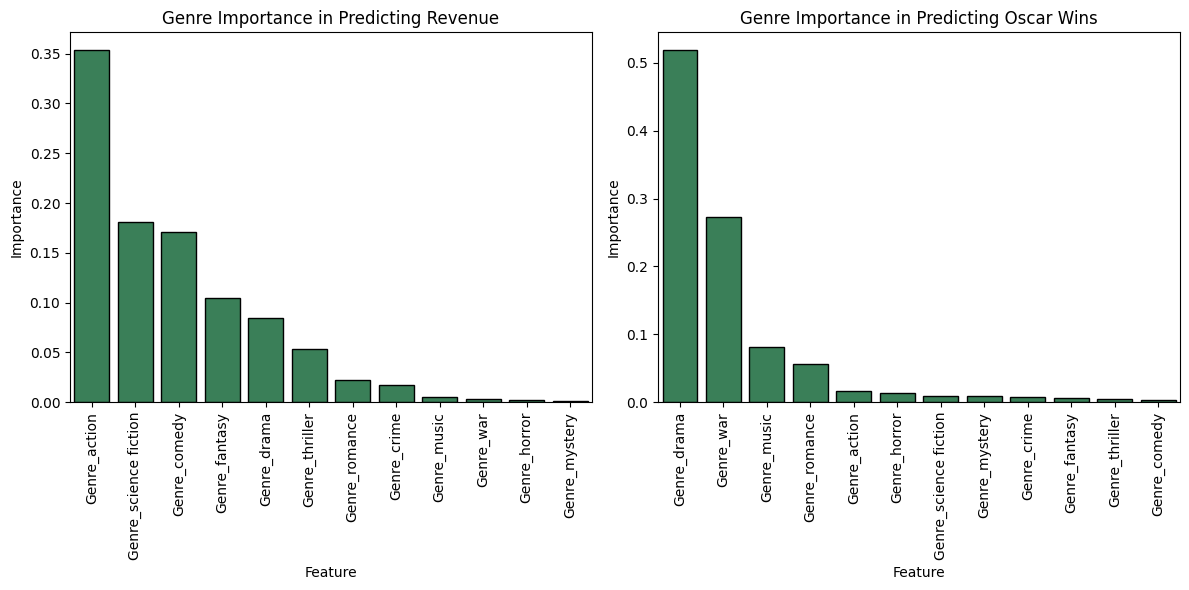

In [41]:
# Decide which columns will be used as inputs and the target
genre_df = regression_df[["Genre_action", "Genre_comedy", "Genre_crime", 
                   "Genre_drama", "Genre_fantasy", "Genre_horror", "Genre_music", "Genre_mystery", "Genre_romance", 
                   "Genre_science fiction", "Genre_thriller", "Genre_war"
]]

X = genre_df

y = regression_df["Revenue_Normalized"]

# Split the data into training and testing data groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Train Random Forest Model
model = RandomForestRegressor(random_state = 2024)

# Fit model to training data
model.fit(X_train, y_train)

# Run the model and make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print model overview
print(f"Random Forest For Earned Revenue Overview")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"R^2 Score: {r2_score(y_test, y_pred_test)}\n")

# Gather the feature importance values
feature_importances = model.feature_importances_

# Create a df to hold the feature names and their importances
feature_names = X.columns
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

# Plot the feature importance
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.barplot(x = "Feature", y = "Importance", data = feature_df, color = "seagreen", edgecolor = "black", ax = axes[0])
axes[0].set_title("Genre Importance in Predicting Revenue")
axes[0].tick_params(axis = "x", rotation = 90)



# Decide which columns will be used as inputs and the target
X = genre_df
y = regression_df["Oscar_Wins"]

# Split the data into training and testing data groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Train Random Forest Model
model = RandomForestRegressor(random_state = 2024)

# Fit model to training data
model.fit(X_train, y_train)

# Run the model and make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print model overview
print(f"Random Forest For Oscar Wins Overview")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"R^2 Score: {r2_score(y_test, y_pred_test)}")

# Gather the feature importance values
feature_importances = model.feature_importances_

# Create a df to hold the feature names and their importances
feature_names = X.columns
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

# Plot the feature importance
sns.barplot(x = "Feature", y = "Importance", data = feature_df, color = "seagreen", edgecolor = "black", ax = axes[1])
axes[1].set_title("Genre Importance in Predicting Oscar Wins")
axes[1].tick_params(axis = "x", rotation = 90)
plt.tight_layout()
plt.show()

## Binary Classification

### Random Forest Classifier For Oscar Wins Prediction

This Random Forest Classifier model aimed to predict whether a movie will win an Oscar based on a variety of features. Inputs of this model include: Year, Runtime, Ratings, Budget, Popularity, Age Rating, and Genres. To evaluate the model's output, a classification report, confusion matrix, and feature importance plot were genreated. 

The classification report indicates that the Random Forest Classifier model achieved an overall accuracy of 91%, indicating that it correctly classified most movies as either award-winning or not. However, the remainder of the classification report brought up more insights. The model performed exceptionally well in identifying movies that do not win awards, which is the majority category with 301 movies. However, it struggled in identifying movies that won awards. This minority category had a low recall of 41%, suggesting that the model often failed to identify award-winning movies. This can likely be attributed to the imbalance of Oscar-winning movies versus non-Oscar-winning movies.

The feature importance plot displayed the features that have the most weight when making a decision on whether a movie was classified as Oscar-winning. The features with the most signficance were ones that dealt with ratings, as well as Runtime and financial data. Out of all the rating systems, the model indicated that Metascore was the most signficant when determining Academy Awards status.

Random Forest For Oscar Wins Overview
Accuracy: 0.9088235294117647
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       301
        True       0.67      0.41      0.51        39

    accuracy                           0.91       340
   macro avg       0.80      0.69      0.73       340
weighted avg       0.90      0.91      0.90       340



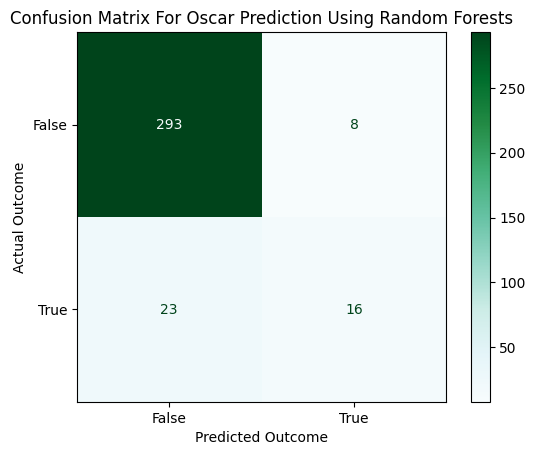

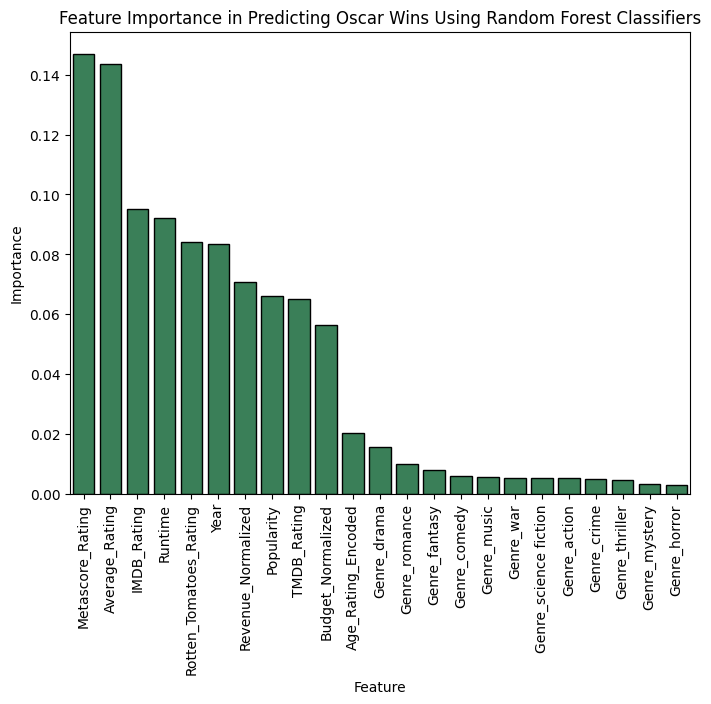

In [42]:
# Decide which columns will be used as inputs and the target
X = regression_df[["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating", 
                   "TMDB_Rating", "Average_Rating", "Budget_Normalized", "Revenue_Normalized", "Popularity", 
                   "Age_Rating_Encoded", "Genre_action", "Genre_comedy", "Genre_crime", 
                   "Genre_drama", "Genre_fantasy", "Genre_horror", "Genre_music", "Genre_mystery", 
                   "Genre_romance", "Genre_science fiction", "Genre_thriller", "Genre_war"]]

y = movies_df["Won_Award"]


# Split the data into training and testing data groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)


# Train Random Forest Model
model = RandomForestClassifier(random_state = 2024)
model.fit(X_train, y_train)

# Run the model and make predictions
y_pred = model.predict(X_test)

# Print model overview
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest For Oscar Wins Overview")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_)
disp.plot(cmap = "BuGn")
plt.title("Confusion Matrix For Oscar Prediction Using Random Forests")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")
plt.show()


# Gather the feature importance values
feature_importances = model.feature_importances_

# Create a df to hold the feature names and their importances
feature_names = X.columns
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

# Plot the feature importance
plt.figure(figsize = (8, 6))
sns.barplot(x = "Feature", y = "Importance", data = feature_df, edgecolor = "black", color = "seagreen")
plt.title("Feature Importance in Predicting Oscar Wins Using Random Forest Classifiers")
plt.tick_params(axis = "x", rotation = 90)
plt.show()



### TF-IDF With Naive Bayes Classfier For Genre Prediction

The model below combined TF-IDF with Naive Bayes Classifiers to predict whether a movie belongs in the War or Romance genre based on the movie overviews. Intially, TF-IDF converted text within the Overviews of each movie to a matrix of TF-IDF values, assigning values based on word importance scores. Naive Bayes then used conditional probabilities to predict the genre of a the given movie overview. It calculated the likelihood of each genre and then applyied Bayes' Theorem to compute the probability of each genre for a given movie overview. The model'performance was evaluated using a classification report and a confusion matrix. Inputs of this model included just movie overviews.

After the model has been trained and predictions are made, it was evaluated using:

- **Classification Report:** This report contains metrics like accuracy, precision, recall, and F1-score for each genre to help evaluate how well the model performs

- **Confusion Matrix:** This matrix shows how often movies from each actual genre were predicted correctly and misclassified as another genre

The Naive Bayes classification results demonstrated that the model performed well in predicting whether a movie falls into the Romance or War genre. According to the classification report, the model achieved an overall accuracy of 89%. For Romance movies, the model showed a strong performance with a precision of 86% and a recall of 93%, indicating that it successfully identified most romance movies in the dataset. Similarly, for War movies, the model achieved a precision of 92% and a recall of 86%. Overall, the results indicated that the model was effective at distinguishing between the War and Romance genres.

              precision    recall  f1-score   support

     romance       0.86      0.93      0.89        27
         war       0.92      0.86      0.89        28

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



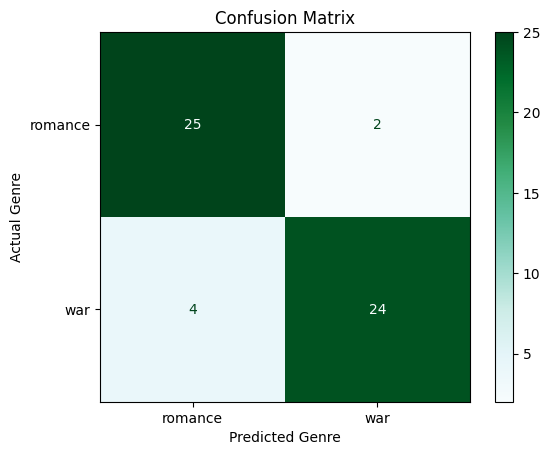

In [35]:
# TF-IDF + Naive Bayes
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features = 5000,
                              max_df = 0.95)),
    ("nb", MultinomialNB())
])

# Filter df to only include two genres
binamial_df = movies_df[movies_df["Genre"].isin(["war", "romance"])]

# Decide which columns will be used as inputs and the target
X = binamial_df["Overview"]
y = binamial_df["Genre"]

# Specify the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1534)
pipeline.fit(X_train, y_train)

# Run the model to make predictions
y_pred = pipeline.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))



# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = pipeline.classes_)
disp.plot(cmap = "BuGn")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix")
plt.show()

## Multi-Class Classification

### TF-IDF With Naive Bayes Classfier For Genre Prediction

The model below is similar to the previous TF-IDF with Naive Bayes Classifiers model, except that it attempted to predict all genres rather than just two. The model predicted movie genres based on the overviews and evaluated the performance using a classification report and a confusion matrix.

After the model has been trained and predictions are made, it was evaluated using:

- **Classification Report:** This report contains metrics like accuracy, precision, recall, and F1-score for each genre to help evaluate how well the model performs

- **Confusion Matrix:** This matrix shows how often movies from each actual genre were predicted correctly and misclassified as another genre

Overall, the model performed better for genres like music, horror, and war, where both precision and recall are higher, but struggled with genres like drama, mystery, and thriller. The model's recall tended to be lower than precision for many genres, indicating that while the model is accurate when it predicted a genre, it failed to classify a substantial portion of the actual instances for specific genres. The drama genre as a whole had very poor recall, which severely impacted the model's overall performance. The accuracy of the entire model was 0.43, meaning the model correctly predicted the genre of 43% of the movies. While these metrics show some level of accuracy, the model still struggled to consistently classify movies into their respective genres.

                 precision    recall  f1-score   support

         action       0.30      0.52      0.38        29
         comedy       0.27      0.50      0.35        22
          crime       0.43      0.73      0.54        26
          drama       0.00      0.00      0.00        24
        fantasy       0.34      0.36      0.35        28
         horror       0.64      0.39      0.48        36
          music       0.65      0.42      0.51        26
        mystery       0.59      0.38      0.46        34
        romance       0.44      0.53      0.48        30
science fiction       0.37      0.47      0.41        30
       thriller       0.44      0.23      0.30        31
            war       0.67      0.67      0.67        24

       accuracy                           0.43       340
      macro avg       0.43      0.43      0.41       340
   weighted avg       0.44      0.43      0.42       340



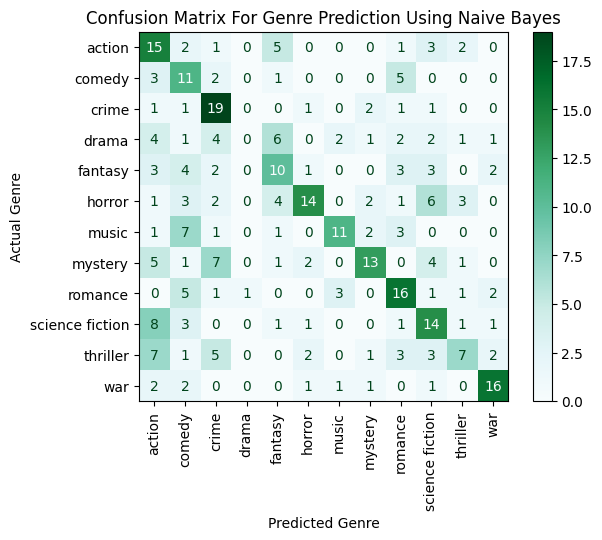

In [43]:
# TF-IDF + Naive Bayes pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features = 5000,
                              max_df = 0.95)),
    ("nb", MultinomialNB())
])

# Decide which columns will be used as inputs and the target
X = movies_df["Overview"]
y = movies_df["Genre"]

# Specify the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1534)
pipeline.fit(X_train, y_train)

# Generate the preidctions
y_pred = pipeline.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))



# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = pipeline.classes_)
disp.plot(cmap = "BuGn")
plt.title("Confusion Matrix For Genre Prediction Using Naive Bayes")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.xticks(rotation = 90)
plt.show()

### Random Forest Classifier for Genre Prediction

The Random Forest Classifier used in this model aimed to predict movie genres based on various features. The model works by creating multiple decision trees and combining their predictions to improve accuracy. After training, the model makes predictions on the test data and evaluates its performance using a classification report and a confusion matrix. Inputs of this model included Year, Runtime, Ratings, Budget, Revenue, Popularity, and Age Rating.

The model's overall accuracy was 0.40, meaning it correctly predicted the genre for 40% of the movies. The classification report revealed varying performance across different genres. It performed relatively well for genres like War (accuracy of 0.60) and Thriller (accuracy of 0.56). However, the model struggled with genres like Science Fiction, where precision, recall, and F1-score were all close to 0.00, indicating that the model failed to predict those movies correctly. Overall, the model has a tendency to perform better in predicting certain genres while underperforming in others.

The feature importance plot below illustrates which features were most influential in the Random Forest model's classification of movies. It shows that financial factors, such as revenue and budget, were by far the most significant predictors. The remaining features had relatively similar levels of importance, with less impact on the model's decision-making process.

Random Forest For Genres Overview
Accuracy: 0.40294117647058825
Classification Report:
                 precision    recall  f1-score   support

         action       0.38      0.56      0.45        27
         comedy       0.56      0.73      0.63        33
          crime       0.29      0.33      0.31        24
          drama       0.38      0.36      0.37        28
        fantasy       0.44      0.30      0.36        27
         horror       0.36      0.50      0.42        28
          music       0.38      0.48      0.43        21
        mystery       0.52      0.30      0.38        37
        romance       0.27      0.39      0.32        28
science fiction       0.06      0.04      0.05        28
       thriller       0.56      0.33      0.42        30
            war       0.60      0.52      0.56        29

       accuracy                           0.40       340
      macro avg       0.40      0.40      0.39       340
   weighted avg       0.41      0.40      0.39       340

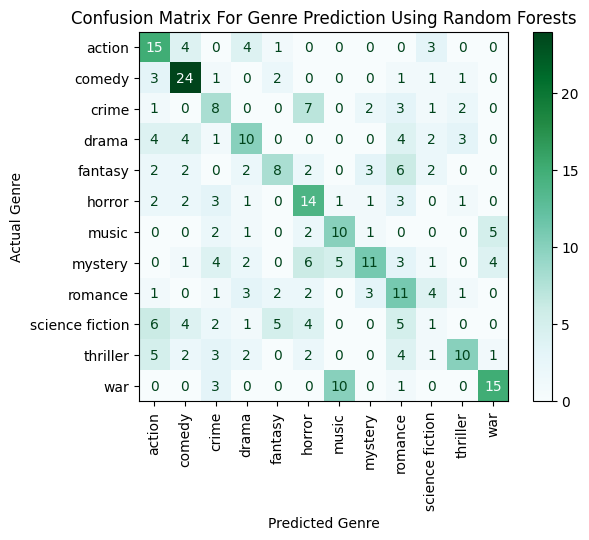

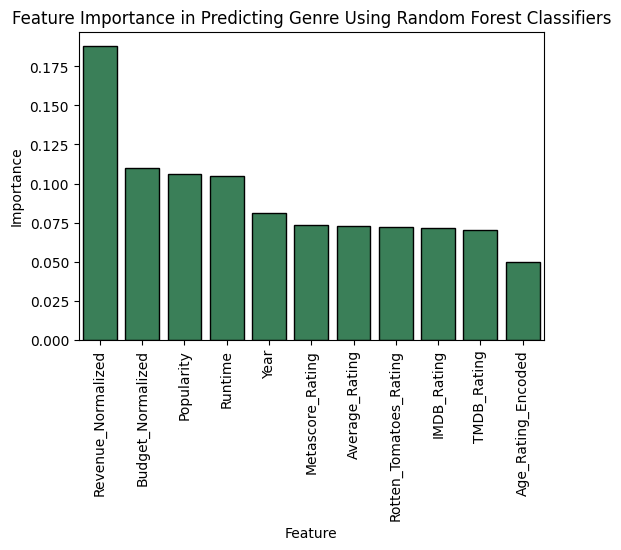

In [37]:
# Decide whihc features will be inputs and the target variable
X = regression_df[["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating", 
                   "TMDB_Rating", "Average_Rating", "Budget_Normalized", "Revenue_Normalized", "Popularity", 
                   "Age_Rating_Encoded"]]

y = movies_df["Genre"]


# Split the dta inot training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)


# Train Random Forest Model
model = RandomForestClassifier(random_state = 2024)
model.fit(X_train, y_train)

# Run te model and make predictions
y_pred = model.predict(X_test)

# Print a model overview
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest For Genres Overview")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_)
disp.plot(cmap = "BuGn")
plt.title("Confusion Matrix For Genre Prediction Using Random Forests")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.xticks(rotation = 90)
plt.show()


# Take out feature miportance values
feature_importances = model.feature_importances_

# Create a df to hold the feature names and their importances
feature_names = X.columns
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (6, 4))
sns.barplot(x = "Feature", y = "Importance", data = feature_df, color = "seagreen", edgecolor = "black")
plt.title("Feature Importance in Predicting Genre Using Random Forest Classifiers")
plt.tick_params(axis = "x", rotation = 90)
plt.show()

{{< include closing.qmd >}} 